In [1]:
import numpy as np 
import pandas as pd

In [2]:
data= pd.read_excel("daily_treasury.xlsx")

In [3]:
data.head(2)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26


In [10]:
data= data.drop(['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr'], axis = 1) 

In [11]:
yield_change= data.set_index('Date').diff()

In [20]:
covar= np.cov(yield_change.values[1:, :].T)

In [21]:
e_val, e_vectors= np.linalg.eig(covar)

In [22]:
e_val, e_vectors

(array([2.97751831e-02, 2.68963378e-03, 2.26415970e-04, 2.07946320e-04,
        8.37500358e-05, 6.94187688e-05, 2.69516582e-05]),
 array([[ 0.2884894 , -0.43991703, -0.51450379, -0.40682195, -0.51147115,
         -0.17653788,  0.01613256],
        [ 0.31729756, -0.42678626, -0.31398975,  0.30122545,  0.68802857,
         -0.17645726,  0.15273814],
        [ 0.32324876, -0.35885434,  0.23527322,  0.07432155, -0.01480465,
          0.55042218, -0.6345651 ],
        [ 0.33870988, -0.20289244,  0.47587519, -0.1347848 , -0.08667204,
          0.29870575,  0.70904793],
        [ 0.39317253,  0.01109597,  0.51636615,  0.01312676, -0.07680928,
         -0.71924885, -0.23509008],
        [ 0.44948957,  0.37194735, -0.24602307,  0.66277539, -0.37597903,
          0.09548441,  0.09663445],
        [ 0.49015964,  0.56206473, -0.16650599, -0.52974047,  0.3316969 ,
          0.13809897, -0.07989618]]))

In [23]:
import matplotlib.pyplot as plt

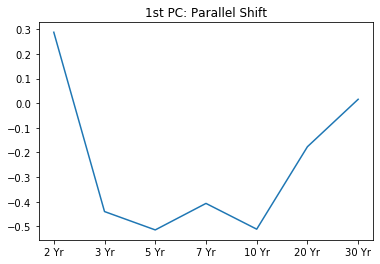

In [28]:
plt.plot(['2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'], e_vectors[0])
plt.title("1st PC: Parallel Shift")
plt.show()

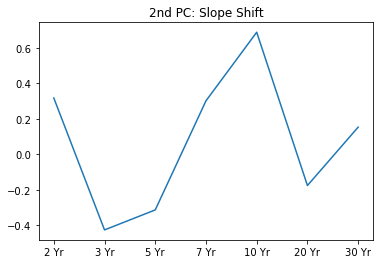

In [29]:
plt.plot(['2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'], e_vectors[1])
plt.title("2nd PC: Slope Shift")
plt.show()

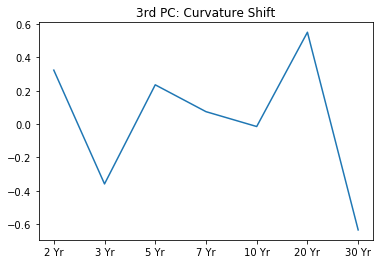

In [30]:
plt.plot(['2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'], e_vectors[2])
plt.title("3rd PC: Curvature Shift")
plt.show()